In [2]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data= pd.read_csv("stocks.csv")

In [5]:
data 

,Symbol,Date,Open,High,Low,Close,Volume,Yesterday Volume,Tomorrows Percent Change
0,AAPL,2016-11-11,107.12,108.87,106.55,108.43,34143898,57134541,-2.508531
1,AAPL,2016-11-14,107.71,107.81,104.08,105.71,51175504,34143898,1.324378
2,AAPL,2016-11-15,106.57,107.68,106.16,107.11,32264510,51175504,2.688825
3,AAPL,2016-11-16,106.70,110.23,106.60,109.99,58840522,32264510,-0.036367
4,AAPL,2016-11-17,109.81,110.35,108.83,109.95,26964598,58840522,0.100045
...,...,...,...,...,...,...,...,...,...
24727,ZNGA,2017-11-01,3.91,3.91,3.78,3.84,8750379,9212959,1.041667
24728,ZNGA,2017-11-02,3.85,3.89,3.80,3.88,6604450,8750379,1.030928
24729,ZNGA,2017-11-03,3.88,3.97,3.86,3.92,12539443,6604450,-1.530612
24730,ZNGA,2017-11-06,3.93,3.94,3.86,3.86,8423778,12539443,-4.922280


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24732 entries, 0 to 24731
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Symbol                    24732 non-null  object 
 1   Date                      24732 non-null  object 
 2   Open                      24654 non-null  float64
 3   High                      24693 non-null  float64
 4   Low                       24674 non-null  float64
 5   Close                     24732 non-null  float64
 6   Volume                    24732 non-null  int64  
 7   Yesterday Volume          24732 non-null  int64  
 8   Tomorrows Percent Change  24732 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.7+ MB


In [11]:
data[data.Open.isna()]

,Symbol,Date,Open,High,Low,Close,Volume,Yesterday Volume,Tomorrows Percent Change
427,ABEV,2017-07-31,NaN,NaN,6.06,6.08,19448043,14726465,0.493421
676,ABX,2017-07-31,NaN,17.08,NaN,16.91,9529370,12819109,1.951508
925,AKS,2017-07-31,NaN,5.68,NaN,5.66,24625537,56129810,-4.770318
1672,AMLP,2017-07-31,NaN,12.02,NaN,12.00,6840173,7055963,0.000000
1921,AUY,2017-07-31,NaN,NaN,NaN,2.60,7167356,13073230,0.000000
...,...,...,...,...,...,...,...,...,...
23167,XLK,2017-07-31,NaN,NaN,NaN,57.16,10982828,10293081,0.507348
23416,XLP,2017-07-31,NaN,55.45,NaN,55.32,7279311,18412186,-0.108460
23665,XLU,2017-07-31,NaN,53.34,NaN,53.22,11861324,9638979,0.563698
23914,XOM,2017-07-31,NaN,80.39,NaN,80.04,12820175,22800785,0.162419


In [13]:
data.fillna(value=0,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24732 entries, 0 to 24731
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Symbol                    24732 non-null  object 
 1   Date                      24732 non-null  object 
 2   Open                      24732 non-null  float64
 3   High                      24732 non-null  float64
 4   Low                       24732 non-null  float64
 5   Close                     24732 non-null  float64
 6   Volume                    24732 non-null  int64  
 7   Yesterday Volume          24732 non-null  int64  
 8   Tomorrows Percent Change  24732 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.7+ MB


In [17]:
for i in data.Date:
    print(i[:4])

2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


In [30]:
data["Year"]= [i[:4] for i in data.Date]
data["Month"]= [i[5:7] for i in data.Date]
data["Day"]= [i[8:11] for i in data.Date]

In [36]:
data.drop("Date",axis=1, inplace=True)

In [43]:
data=pd.get_dummies(data,columns=["Symbol"], drop_first=True,)

In [45]:
data.shape

(24732, 109)

In [47]:
data.drop("Close", axis=1)

,Open,High,Low,Volume,Yesterday Volume,Tomorrows Percent Change,Year,Month,Day,Symbol_ABEV,...,Symbol_XIV,Symbol_XLE,Symbol_XLF,Symbol_XLK,Symbol_XLP,Symbol_XLU,Symbol_XOM,Symbol_XOP,Symbol_YHOO,Symbol_ZNGA
0,107.12,108.87,106.55,34143898,57134541,-2.508531,2016,11,11,0,...,0,0,0,0,0,0,0,0,0,0
1,107.71,107.81,104.08,51175504,34143898,1.324378,2016,11,14,0,...,0,0,0,0,0,0,0,0,0,0
2,106.57,107.68,106.16,32264510,51175504,2.688825,2016,11,15,0,...,0,0,0,0,0,0,0,0,0,0
3,106.70,110.23,106.60,58840522,32264510,-0.036367,2016,11,16,0,...,0,0,0,0,0,0,0,0,0,0
4,109.81,110.35,108.83,26964598,58840522,0.100045,2016,11,17,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24727,3.91,3.91,3.78,8750379,9212959,1.041667,2017,11,01,0,...,0,0,0,0,0,0,0,0,0,1
24728,3.85,3.89,3.80,6604450,8750379,1.030928,2017,11,02,0,...,0,0,0,0,0,0,0,0,0,1
24729,3.88,3.97,3.86,12539443,6604450,-1.530612,2017,11,03,0,...,0,0,0,0,0,0,0,0,0,1
24730,3.93,3.94,3.86,8423778,12539443,-4.922280,2017,11,06,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
X = data.drop("Close", axis=1)
y = data.Close

In [50]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state= 2021)

In [55]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [66]:
y_train_pred = LR.predict(X_train)
train_sqrt = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [67]:
y_pred = LR.predict(X_test)
test_sqrt = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [69]:
print("Training MSRE: " + str(train_sqrt))
print("Test MSRE: " + str(test_sqrt))

Training MSRE: 1.4398188137166816
Test MSRE: 3.570470982714206


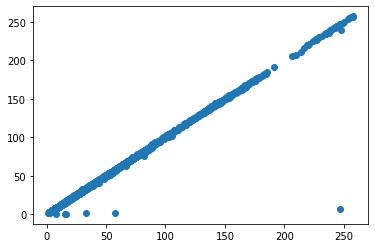

In [99]:
plt.scatter(y_test,y_pred)

In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lr_model = ols(formula='Close~Open+High+Low', data=data).fit()

In [86]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.105e+06
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:05:56   Log-Likelihood:                -53437.
No. Observations:               24732   AIC:                         1.069e+05
Df Residuals:                   24728   BIC:                         1.069e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0603      0.018      3.334      0.001       0.025       0.096
Open          -0.8288      0.013    -65.862      0.000      -0.853      -0.804
High           0.9210      0.008    113.036      0.000       0.905       0.937
Low            0.9074      0.010     90.781      0.000       0.888       0.927
==============================================================================
Omnibus:                    92463.490   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      77733382668.738
Skew:                          82.775   Prob(JB):                         0.00
Kurtosis:                    8686.621   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X.corrwith(y)

Open                0.997497
High                0.998232
Low                 0.997989
Volume              0.125273
Yesterday Volume    0.124499
                      ...   
Symbol_XLU          0.036540
Symbol_XOM          0.113031
Symbol_XOP         -0.003393
Symbol_YHOO         0.037827
Symbol_ZNGA        -0.083265
Length: 105, dtype: float64